# Causes of Heart Disease

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or - definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Our Data is Clean

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

###  Copying the data into new DataFrame and replacing numeric values to more understandable 
###   values for better Visualization

In [7]:
df = data.copy()

In [8]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['cp'][df['cp'] == 1] = 'typical angina'
df['cp'][df['cp'] == 2] = 'atypical angina'
df['cp'][df['cp'] == 3] = 'non-anginal pain'
df['cp'][df['cp'] == 4] = 'asymptomatic'

df['fbs'][df['fbs'] == 0] = 'lower than 120mg/ml'
df['fbs'][df['fbs'] == 1] = 'greater than 120mg/ml'

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

df['slope'][df['slope'] == 1] = 'upsloping'
df['slope'][df['slope'] == 2] = 'flat'
df['slope'][df['slope'] == 3] = 'downsloping'

df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata

### Changing Data Types

In [9]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [11]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

# Data Visualization

### Our Visualization shows that 'Aged' people and people with 'Thalassemia' and Heart 


### Vessels issues were effected more

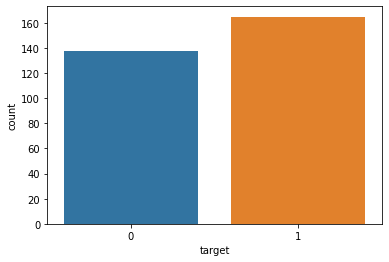

In [12]:
sns.countplot('target', data=df)

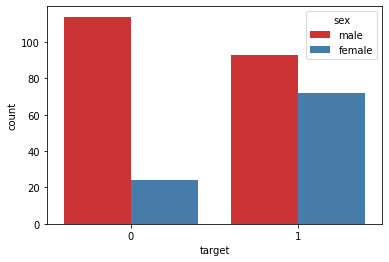

In [13]:
sns.countplot('target', data=df, hue='sex', palette="Set1")

In [14]:
df[['target', 'sex']].groupby(['sex'], as_index=False).mean().sort_values(by='sex', ascending=False)

,sex,target
1,male,0.449275
0,female,0.750000


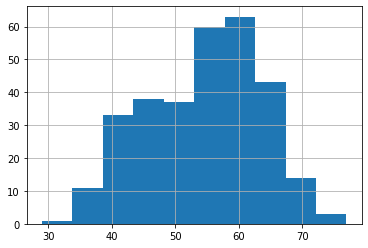

In [15]:
df['age'].hist()

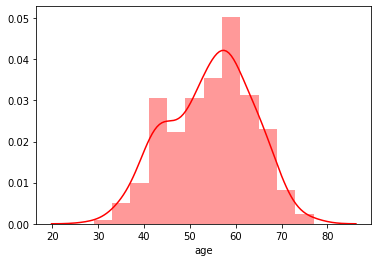

In [16]:
sns.distplot(df['age'], color = 'red')

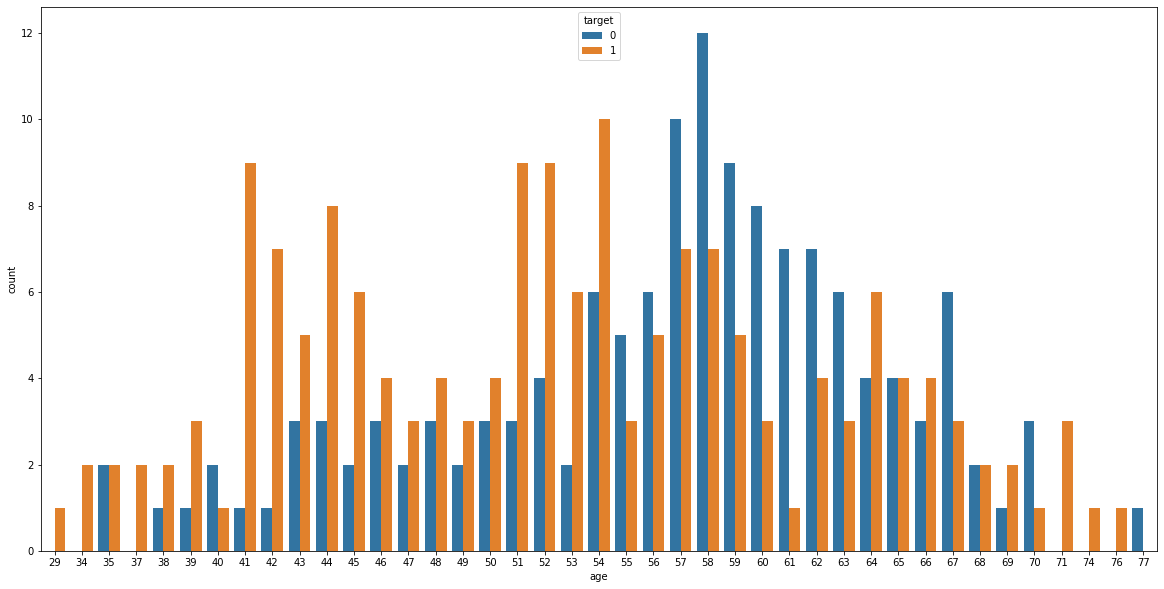

In [17]:
plt.figure(figsize=(20,10))
sns.countplot('age', hue='target', data=df)

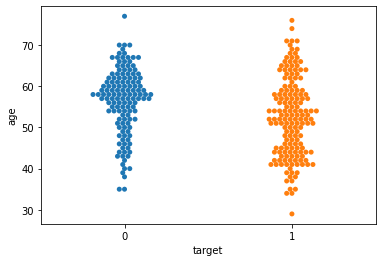

In [18]:
sns.swarmplot('target', 'age', data=df)

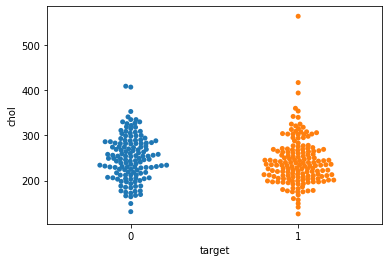

In [19]:
sns.swarmplot('target', 'chol', data=df)

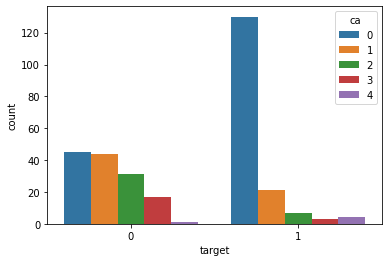

In [20]:
sns.countplot('target', hue='ca', data=df)

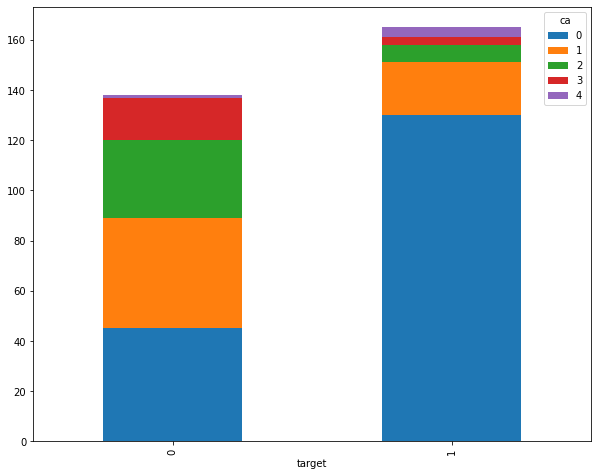

In [21]:
df.groupby(['target','ca']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8))
plt.show()

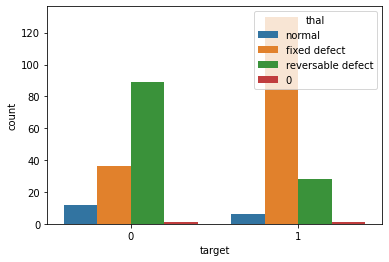

In [22]:
sns.countplot('target', hue='thal', data=df)

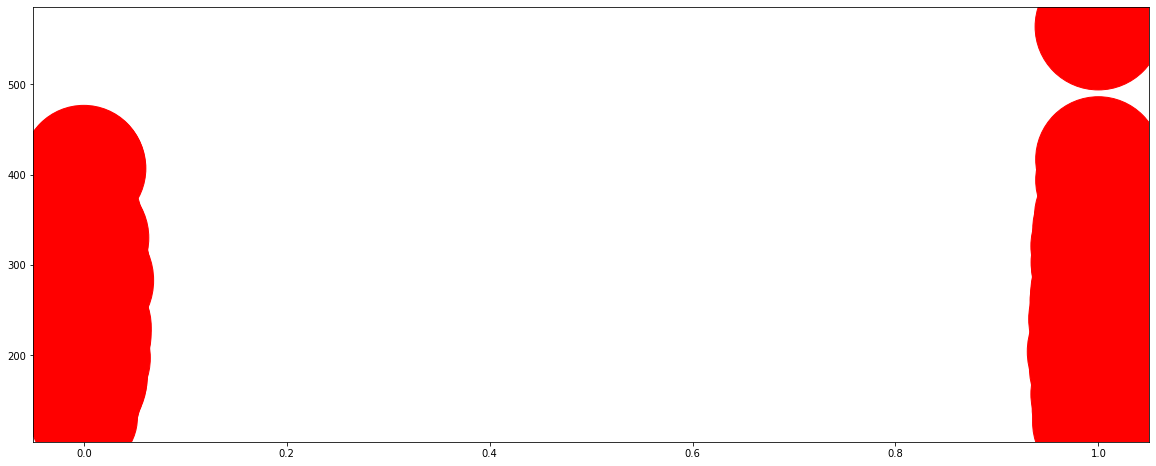

In [23]:
plt.figure( figsize=(20,8))
plt.scatter(x = df['target'], y = df['chol'], s = data['thalach']*100, color = 'red')

# Model Building

In [24]:
#storind Dependant feature "TARGET" in label

label = data['target']

In [25]:
label.unique()

array([1, 0], dtype=int64)

In [26]:
label.value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
#Storing independent Features in Data variable

data=data.drop(['target'], axis=1)

In [28]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
label.shape

(303,)

In [30]:
x = data

# Splitting into train and test data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, label, test_size = 0.2,  random_state=10)

In [33]:
x_train.shape

(242, 13)

In [34]:
x_test.shape

(61, 13)

In [35]:
y_train.shape

(242,)

In [36]:
y_test.shape

(61,)

# Models

### 1. RandomForestClassifier
### 2. DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
mod1 = RandomForestClassifier(max_leaf_nodes=10)
mod1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
mod2 = DecisionTreeClassifier()
mod2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
pred_1 = mod1.predict(x_test)
pred_quant1 = mod1.predict_proba(x_test)[:, 1]
pred1 = mod1.predict(x_test)

pred_2 = mod2.predict(x_test)
pred_quant2 = mod2.predict_proba(x_test)[:, 1]
pred2 = mod2.predict(x_test)


## Evaluating Models ACcuracy

In [41]:
score1_train=mod1.score(x_train, y_train)
print(f'Training Random Forest: {round(score1_train*100,2)}%')

score1_test=mod1.score(x_test,y_test)
print(f'Testing Random Forest: {round(score1_test*100,2)}%')

Training Random Forest: 90.5%
Testing Random Forest: 81.97%


In [42]:
score2_train=mod2.score(x_train, y_train)
print(f'Training Decision Tree: {round(score2_train*100,2)}%')

score2_test=mod2.score(x_test,y_test)
print(f'Testing Decision Tree: {round(score2_test*100,2)}%')

Training Decision Tree: 100.0%
Testing Decision Tree: 75.41%


In [43]:
mod1.predict(x_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [44]:
mod1.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

array([1], dtype=int64)

### Note: Random Forest Performed better than DecisionTreeClassifier

# Confusion Matrix

In [45]:
from sklearn.metrics  import confusion_matrix

In [46]:
confusion_matrix(y_test, pred1)

array([[27,  8],
       [ 3, 23]], dtype=int64)

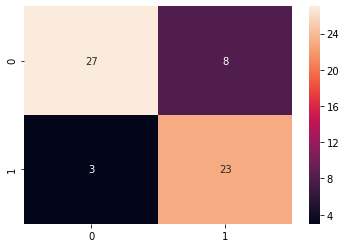

In [47]:
sns.heatmap(confusion_matrix(y_test, pred1), annot=True)

In [48]:
confusion_matrix(y_test, pred2)

array([[24, 11],
       [ 4, 22]], dtype=int64)

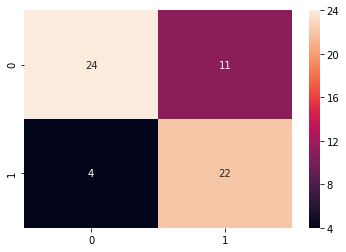

In [49]:
sns.heatmap(confusion_matrix(y_test, pred2), annot=True)

In [50]:
y_pred_quant1 = mod1.predict_proba(x_test)[:, 1]

In [51]:
y_pred_quant2 = mod2.predict_proba(x_test)[:, 1]

# ROC Curve

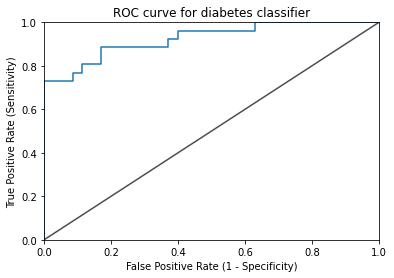

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant1)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

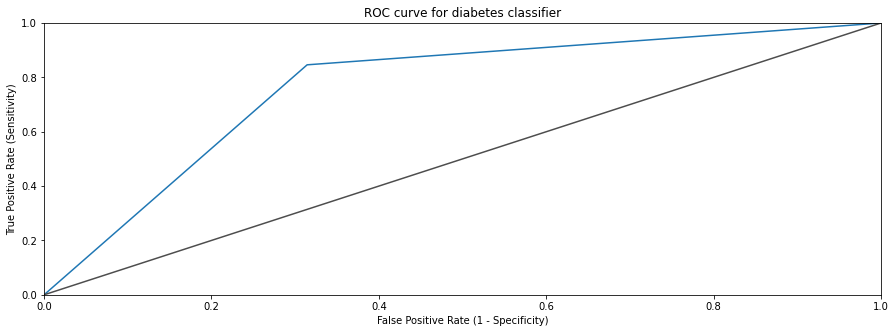

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant2)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Main Causes of Heart Disease 

In [54]:
import eli5 
from eli5.sklearn import PermutationImportance
perm1 = PermutationImportance(mod1, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm1, feature_names = x_test.columns.tolist())

C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\usama\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.0656 ± 0.0587,cp
0.0393 ± 0.0161,thal
0.0328 ± 0.0359,oldpeak
0.0230 ± 0.0262,slope
0.0098 ± 0.0445,ca
0.0098 ± 0.0262,sex
0.0066 ± 0.0161,age
0 ± 0.0000,restecg
0 ± 0.0000,fbs
0.0000 ± 0.0207,trestbps


In [55]:
perm2 = PermutationImportance(mod2, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm2, feature_names = x_test.columns.tolist())

Weight,Feature
0.0393 ± 0.0334,ca
0.0361 ± 0.0245,chol
0.0328 ± 0.0688,cp
0.0295 ± 0.0482,slope
0.0295 ± 0.0321,oldpeak
0.0262 ± 0.0445,exang
0.0262 ± 0.0445,thalach
0.0131 ± 0.0245,age
0.0066 ± 0.0161,sex
0 ± 0.0000,thal



### From our analysis we can say that the main causes of heart disease are:

- Major Heart Vessels(0-3). 
- The high chest pain
- High Cholestrol
- Thalassemia
- oldpeak
- slope